In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [3]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv"
mall_customers_df = pd.read_csv(url)
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# rename the Annual Income (k$)	Spending Score (1-100) column
mall_customers_df.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k$',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Show the first few rows to verify
mall_customers_df.head()

,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# describe data
mall_customers_df.describe()


,CustomerID,Age,Annual_Income_k$,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check for null values in the dataset
mall_customers_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income_k$,0
Spending_Score,0


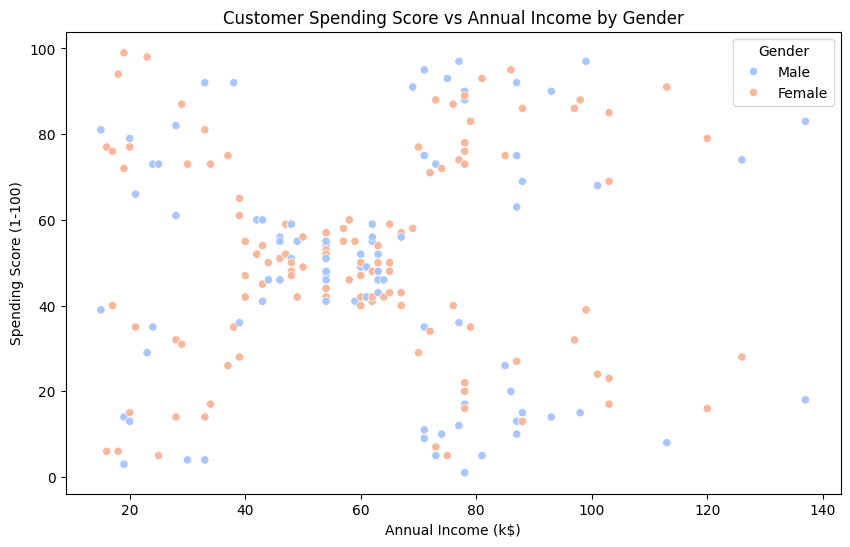

In [7]:
# make an insightful visualization and explain

# Plot: Scatterplot of Annual Income vs. Spending Score, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_customers_df, x='Annual_Income_k$', y='Spending_Score', hue='Gender', palette='coolwarm')

# Title and Labels
plt.title('Customer Spending Score vs Annual Income by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

In [ ]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
income_spending_df = mall_customers_df[['Annual_Income_k$', 'Spending_Score']]
income_spending_df.head()

,Annual_Income_k$,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [13]:
# scale dataset with standard scaler
# Rename columns if not already done
mall_customers_df.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k$',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Selecting only numerical columns
numerical_columns = ['Annual_Income_k$', 'Spending_Score', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
mall_customers_df[numerical_columns] = scaler.fit_transform(mall_customers_df[numerical_columns])

# Display the scaled data
mall_customers_df.head()


,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [14]:
# get stastical information on the new dataset
mall_customers_df.describe()


,CustomerID,Age,Annual_Income_k$,Spending_Score
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,57.879185,1.002509e+00,1.002509e+00,1.002509e+00
min,1.000000,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,50.750000,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,100.500000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,150.250000,7.284319e-01,6.656748e-01,8.851316e-01
max,200.000000,2.235532e+00,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

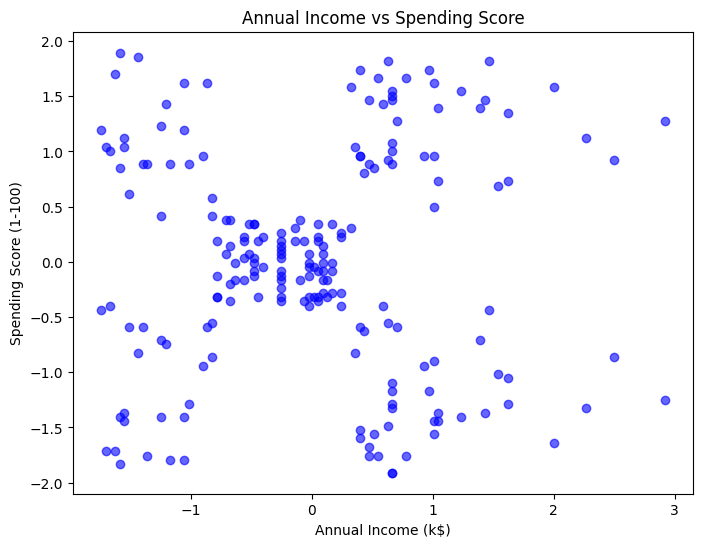

In [23]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(mall_customers_df['Annual_Income_k$'], mall_customers_df['Spending_Score'], alpha=0.6, color='b')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


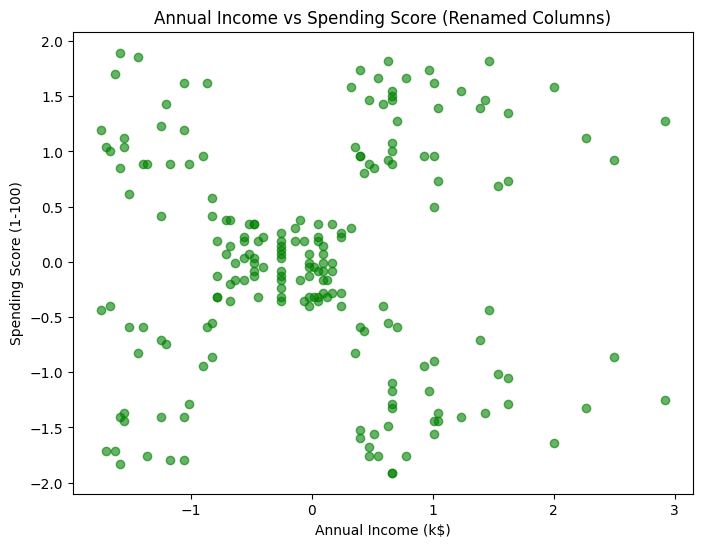

In [22]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(mall_customers_df['Annual_Income_k$'], mall_customers_df['Spending_Score'], alpha=0.6, color='g')
plt.title('Annual Income vs Spending Score (Renamed Columns)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [20]:
# set the parameter for evaluating K

# Assuming 'mall_customers_df' is already loaded
X = mall_customers_df[['Annual_Income_k$', 'Spending_Score']]  # Or use the scaled data

# Initialize an empty list to store the sum of squared errors (SSE) for each K
sse = []

# Set the range of K values to test (from 1 to 10 clusters)
k_range = range(1, 11)

# Evaluate KMeans for each value of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(X)  # Fit the KMeans model
    sse.append(kmeans.inertia_)  # The SSE (inertia) is stored for each K



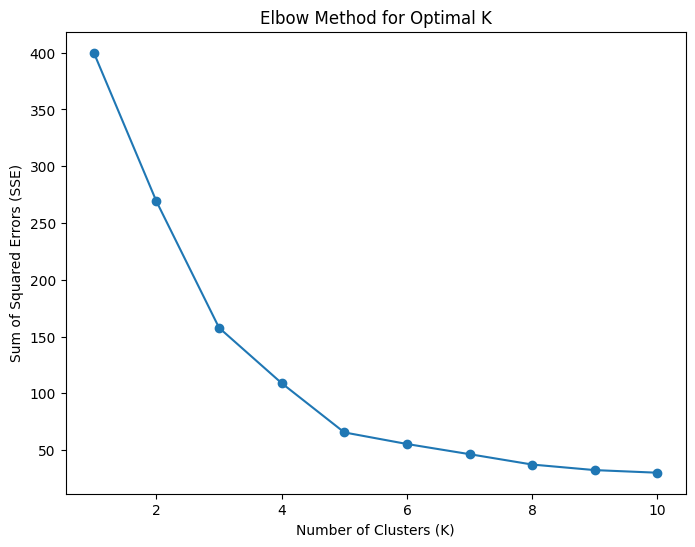

In [21]:
# manually visualize the elbow method using plotlib
# Plot the Elbow curve without the grid
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [25]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(k_range, sse, curve='convex', direction='decreasing')

# The best K for the model
best_k = kneedle.elbow
print(f"The best k for your model is {best_k}")

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [26]:
# assign cluster with K-Means algorithm

# Assuming 'mall_customers_df' is already loaded
X = mall_customers_df[['Annual_Income_k$', 'Spending_Score']]  # Or use the scaled data

# Define the KMeans model with the specified parameters
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)

# Fit the KMeans model
kmeans.fit(X)

# Assign clusters to the data points
clusters = kmeans.predict(X)

# Output the cluster labels (which is the array you asked for)
print(clusters)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


Visualize your result based on income and spending. You also can show the final position of the centroid.

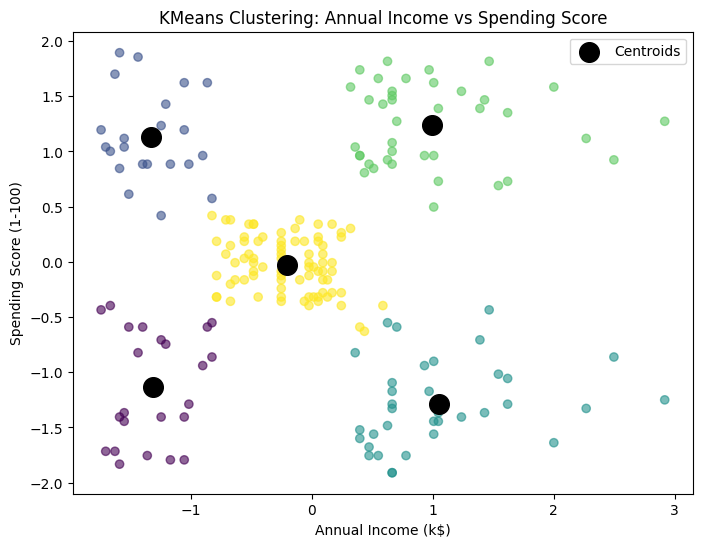

In [29]:
# visualize the result using scater chart

# Assuming 'mall_customers_df' is already loaded and the KMeans model is fitted
X = mall_customers_df[['Annual_Income_k$', 'Spending_Score']]  # Or use the scaled data

# Define the KMeans model with the specified parameters
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)

# Fit the KMeans model
kmeans.fit(X)

# Assign clusters to the data points
clusters = kmeans.predict(X)

# Plot the data points with cluster colors
plt.figure(figsize=(8, 6))

# Scatter plot with clusters
plt.scatter(X['Annual_Income_k$'], X['Spending_Score'], c=clusters, cmap='viridis', alpha=0.6)

# Plot the centroids (black circles)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='o', label='Centroids')

# Title and labels
plt.title('KMeans Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Show the plot
plt.show()


In [33]:
# Inverse transform the scaled data to get the original values
scaler = StandardScaler()

# Fit the scaler on the original data (before scaling) to get the scaling parameters (mean and std)
scaler.fit(mall_customers_df[['Annual_Income_k$', 'Spending_Score']])

# Now, inverse transform the scaled data
original_data = scaler.inverse_transform(mall_customers_df[['Annual_Income_k$', 'Spending_Score']])

# Convert the result back to a DataFrame
original_df = pd.DataFrame(original_data, columns=['Annual_Income_k$', 'Spending_Score'])

# Display the original data
original_df.head()

,Annual_Income_k$,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [32]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
mall_customers_df['Cluster'] = clusters

# Group the data by the 'Cluster' and calculate the mean of 'Annual_Income_k$' and 'Spending_Score'
cluster_means = mall_customers_df.groupby('Cluster')[['Annual_Income_k$', 'Spending_Score']].mean()

# Display the mean values for each cluster
cluster_means

,Annual_Income_k$,Spending_Score
Cluster,,
0,-1.307519,-1.136965
1,-1.329545,1.132178
2,1.055003,-1.284439
3,0.991583,1.239503
4,-0.200913,-0.026456


Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

The clustering results show different customer groups based on income and spending. Cluster 0 has low income and spending, so they could be offered budget-friendly products and loyalty rewards. Cluster 1 has moderate income and high spending, making them a good target for mid-range products and exclusive offers. Cluster 2, with high income and strong spending, should receive premium products and personalized marketing. Cluster 3, with average income and moderate spending, can be engaged with affordable products and promotions, while Cluster 4, with low income and spending, may respond to value-based deals and loyalty programs. By understanding these groups, the company can adjust its marketing, product recommendations, and customer service to increase satisfaction and boost sales.
